# UCS2612 Machine Learning Lab

## ASSIGNMENT 2: Loan Amount Prediction Using Linear Regression and Visualization

### Name: Jahnavi Murali
### Reg. No.: 3122 21 5001 038
### Sem & Section: 6-'A'

## Importing Necessary Python Libraries and Functions

In [169]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [126]:
loan_data = pd.read_csv('archive/train.csv')
print("Number of records: "+str(loan_data.shape[0])+"\nNumber of attributes (columns): "+str(loan_data.shape[1]))

Number of records: 30000
Number of attributes (columns): 24


In [49]:
loan_data.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


## Pre-Processing the data

### Handling null values/ NaN values

In [127]:
# number of missing values per column and their data-type
missing_values=loan_data.isnull().sum()
data_types = loan_data.dtypes

data_info = pd.concat([missing_values, data_types], axis=1)
data_info.columns = ['No. Missing Values', 'Data Type']
data_info

,No. Missing Values,Data Type
Customer ID,0,object
Name,0,object
Gender,53,object
Age,0,int64
Income (USD),4576,float64
Income Stability,1683,object
Profession,0,object
Type of Employment,7270,object
Location,0,object
Loan Amount Request (USD),0,float64


In [128]:
# Drop columns Customer ID, Name, Profession and Type of Employment (non-categorical string variables) 
# as they would not be relevant in loan amount prediction
loan_data.drop(columns=['Customer ID', 'Name', 'Profession', 'Type of Employment'], inplace=True)

In [129]:
# Replace all missing float and int values with the mean of those attributes, 
# and all missing object (text or other) values with the mode of those attributes

# Numerical attributes with missing values: Income (USD), Current Loan Expenses (USD), Dependents,
# Credit Score, Property Age, Loan Sanction Amount (USD) 

numeric_columns = loan_data.select_dtypes(include=[np.number]).columns
loan_data[numeric_columns] = loan_data[numeric_columns].fillna(loan_data[numeric_columns].mean())

# Categorical attributes with missing values: Gender, Income Stability,Has Active Credit Card
# Property Location	

object_columns = loan_data.select_dtypes(include=['object']).columns
loan_data[object_columns] = loan_data[object_columns].fillna(loan_data[object_columns].mode().iloc[0])



### One-Hot Encoding of Categorical Variables

In [130]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode each categorical column
for column in object_columns:
    class_mapping={}
    loan_data[column] = label_encoder.fit_transform(loan_data[column])
    class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
    print(column+"\n"+str(class_mapping))

Gender
{0: 'F', 1: 'M'}
Income Stability
{0: 'High', 1: 'Low'}
Location
{0: 'Rural', 1: 'Semi-Urban', 2: 'Urban'}
Expense Type 1
{0: 'N', 1: 'Y'}
Expense Type 2
{0: 'N', 1: 'Y'}
Has Active Credit Card
{0: 'Active', 1: 'Inactive', 2: 'Unpossessed'}
Property Location
{0: 'Rural', 1: 'Semi-Urban', 2: 'Urban'}


### Standardization/ Normalization of Numerical attributes


In [134]:

# Initialize StandardScaler for standardization
scaler_standard = StandardScaler()

# Initialize MinMaxScaler for normalization
scaler_minmax = MinMaxScaler()

# Standardize/Normalize the numeric columns
loan_data_standardized = loan_data.copy()
loan_data_normalized = loan_data.copy()
loan_data_standardized[numeric_columns] = scaler_standard.fit_transform(loan_data[numeric_columns])  # Standardization
loan_data_normalized[numeric_columns] = scaler_minmax.fit_transform(loan_data[numeric_columns])  # Normalization

## Exploratory Data Analysis & Feature Engineering Techniques

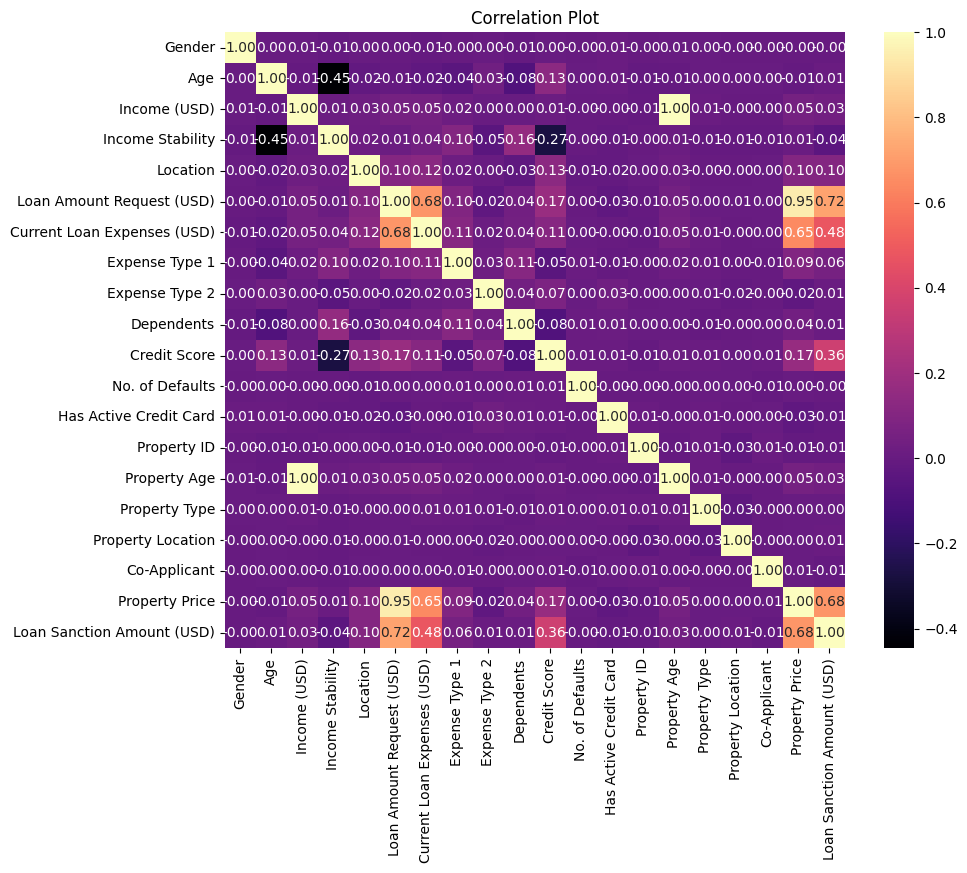

In [139]:
# Correlation Matrix and Heat Map
correlation_matrix = loan_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [165]:
# Identifying best features using Correlation Analysis

# Split the data into features (X) and target variable (y)
X = loan_data.drop(columns=['Loan Sanction Amount (USD)'])
y = loan_data['Loan Sanction Amount (USD)']

# Correlation Analysis
correlation = loan_data.corr()['Loan Sanction Amount (USD)'].abs().sort_values(ascending=False)
best_features_corr = correlation[1:].index.tolist()  # Excluding the target variables


print("Best Features by Correlation Analysis:\n", best_features_corr[:5])


Best Features by Correlation Analysis:
 ['Loan Amount Request (USD)', 'Property Price', 'Current Loan Expenses (USD)', 'Credit Score', 'Location']


In [157]:
# Initialize SelectKBest with F-regression
best_features = SelectKBest(score_func=f_regression, k=5)

# Fit and transform the feature matrix
X_new = best_features.fit_transform(X, y)

# Display selected features
print("Best Features by SelectKBest:", X.columns[best_features.get_support()])


Best Features by SelectKBest: Index(['Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Credit Score', 'Property Price', 'Location'],
      dtype='object')


A total of 5 features has been selected to predict loan sanction amount:
'Loan Amount Request (USD)', 'Current Loan Expenses (USD)','Credit Score', 'Property Price', 'Location'

## Train & Test Split

In [166]:
X = loan_data_normalized[['Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Property Price','Location']]
y = loan_data_normalized['Loan Sanction Amount (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression

In [167]:
# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

## Model Evaluation

In [171]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.004073827954804085
Mean Absolute Error: 0.04487128814215562
R^2 Score: 0.5867603170116495


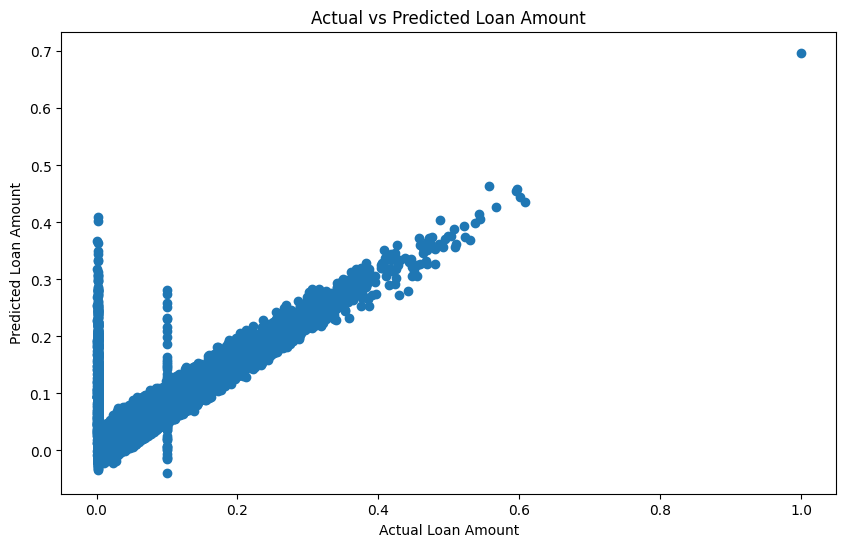

In [161]:
# Plotting predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.title('Actual vs Predicted Loan Amount')
plt.show()